In [ ]:

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib


In [ ]:
df = pd.read_csv("/Users/aditigarg/Downloads/test.csv")


print(df.shape)
print(df.head())


(2000, 2)
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0


In [51]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # allow numbers too
    text = re.sub(r'\s+', ' ', text)  # normalize whitespace
    return text.strip()


In [ ]:

df['text'] = df['text'].astype(str).apply(clean_text)


df = df[df['text'].str.strip() != '']
print(f"Cleaned data: {df.shape}")
print(df.sample(5))


Cleaned data: (2000, 2)
                                                   text  label
388   i electrocuted my thumb and i cant type too we...      1
1665               i always feel so dull in the morning      0
713   i know some people are more fond of the treat ...      2
1938  i feel rebellious i wish i could do things leg...      3
475   i feel very honored to have been shortlisted w...      1


In [ ]:
# TF-IDF Vectorization
X = df['text']
y = df['label']

vectorizer = TfidfVectorizer(stop_words='english', max_features=12000, ngram_range=(1,1))
X_vect = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42, stratify=y
)



In [ ]:
# Train LinearSVC
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_test)
svc_acc = accuracy_score(y_test, svc_preds)
print("LinearSVC Accuracy:", svc_acc)
print("\nLinearSVC Classification Report:\n", classification_report(y_test, svc_preds))


LinearSVC Accuracy: 0.7875

LinearSVC Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       116
           1       0.75      0.95      0.84       139
           2       0.75      0.38      0.50        32
           3       0.83      0.69      0.75        55
           4       0.85      0.76      0.80        45
           5       1.00      0.38      0.56        13

    accuracy                           0.79       400
   macro avg       0.83      0.66      0.71       400
weighted avg       0.80      0.79      0.78       400



In [ ]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)
print("Logistic Regression Accuracy:", log_acc)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_preds))


Logistic Regression Accuracy: 0.595

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72       116
           1       0.53      0.96      0.69       139
           2       1.00      0.03      0.06        32
           3       1.00      0.15      0.25        55
           4       0.86      0.13      0.23        45
           5       0.00      0.00      0.00        13

    accuracy                           0.59       400
   macro avg       0.68      0.34      0.32       400
weighted avg       0.69      0.59      0.51       400



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

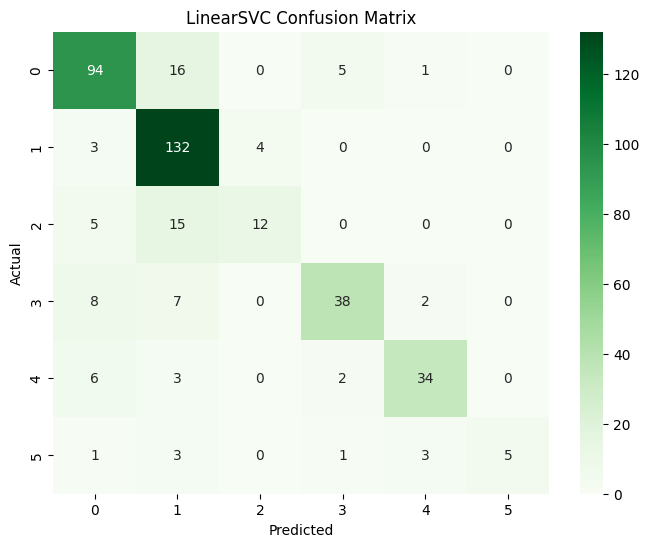

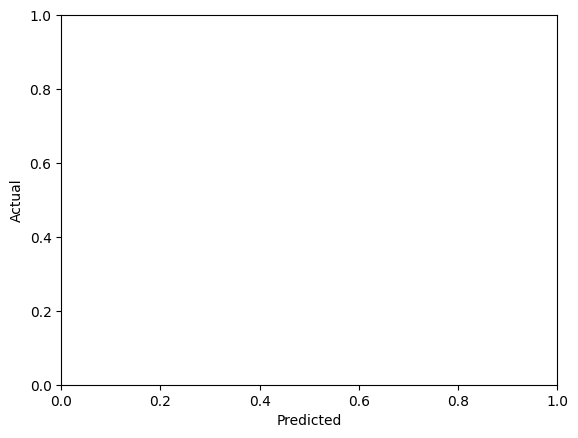

In [ ]:

labels_present = sorted(y_test.unique())
cm = confusion_matrix(y_test, svc_preds, labels=labels_present)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels_present,
            yticklabels=labels_present)
plt.title('LinearSVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:

comparison = pd.DataFrame({
    'Model': ['LinearSVC', 'Logistic Regression'],
    'Accuracy': [svc_acc, log_acc]
})
print("\nModel Comparison:\n")
print(comparison)



Model Comparison:

                 Model  Accuracy
0            LinearSVC    0.7875
1  Logistic Regression    0.5950


In [ ]:

joblib.dump(svc_model, 'emotion_model_linearSVC.pkl')
joblib.dump(log_model, 'emotion_model_logistic.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:

if svc_acc >= log_acc:
    print(f"Best model: LinearSVC with accuracy {svc_acc:.4f}")
    joblib.dump(svc_model, 'best_emotion_model.pkl')
else:
    print(f"Best model: Logistic Regression with accuracy {log_acc:.4f}")
    joblib.dump(log_model, 'best_emotion_model.pkl')

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


Best model: LinearSVC with accuracy 0.7875


['tfidf_vectorizer.pkl']